In [1]:
import numpy as np

from PIL import Image
from scipy.ndimage import sobel
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow



In [2]:
im = Image.open("nist_dataset/micrographs/micrograph20.tif")
#Image.open("nist_dataset/micrographs/micrographs/micrograph20.tif")

In [3]:
data = np.array(im)
print(data.shape)

(522, 645)


In [4]:
A=np.array([[1,1],[3,2]])
b=np.array([645])
print(b @ np.linalg.inv(A))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

(array([[169.,  56.,  36., ...,  31.,  52.,  93.],
        [165.,  63.,  39., ...,  42.,  55.,  68.],
        [158.,  70.,  29., ...,  30.,  58.,  96.],
        ...,
        [ 95.,  47.,  33., ...,  41.,  54.,  47.],
        [ 88.,  35.,  43., ...,  43.,  43.,  62.],
        [ 82.,  38.,  43., ...,  37.,  46.,  49.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 645 BarContainer objects>)

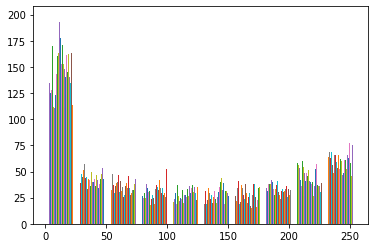

In [11]:
plt.hist(sobel(data[:-40,:]))

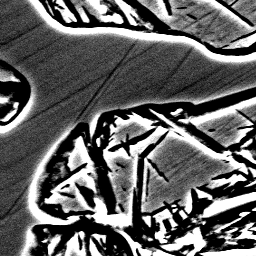

In [6]:
Image.fromarray(data[:256,:256])

In [6]:
np.savetxt("image_csv_files/image.csv",data[:256,:256], fmt="%d")

In [7]:
np.savetxt("image_csv_files/image1.csv",data[-256:,-256:], fmt="%d")
